In [1]:
# Good coding convention: Move all imports to the top of your notebook/file
import pandas as pd
import numpy as np # We will also be needing numpy as pandas is tightly integrated with numpy

# Pandas and Data Visualization
## Pandas
### Motivation for pandas
Dictionaries allow us to save multiple attributes of a particular object. For example, we can store some information about a lesson:

In [2]:
lesson_5 = {
    'topic': 'Numpy',
    'teacher': 'Sam',
    'week': 5
}

Often, we collect multiple observations for which we record the same attributes and we'd like to store them together:

In [3]:
lesson_3 = {
    'topic': 'Basics of Python 2',
    'teacher': 'Jasmine',
    'week': 3
}
lesson_1 = {
    'topic': 'Setting up Python',
    'teacher': 'Jasmine',
    'week': 1
}

We could go about this by storing them in a list:

In [4]:
lst_lessons = [lesson_5, lesson_3, lesson_1]

In [5]:
lst_lessons

[{'topic': 'Numpy', 'teacher': 'Sam', 'week': 5},
 {'topic': 'Basics of Python 2', 'teacher': 'Jasmine', 'week': 3},
 {'topic': 'Setting up Python', 'teacher': 'Jasmine', 'week': 1}]

However, such lists are lacking a lot of functionality. For example, we may want to print out only those observations where Jasmine was the teacher. We'd have to use a for loop for this:

In [6]:
jasmines_lessons = [
    lesson for lesson in lst_lessons if lesson['teacher'] == 'Jasmine'
]
jasmines_lessons

[{'topic': 'Basics of Python 2', 'teacher': 'Jasmine', 'week': 3},
 {'topic': 'Setting up Python', 'teacher': 'Jasmine', 'week': 1}]

We therefore need a new data structure that can record multiple pieces of information about multiple observations. This is provided by `pandas` (which stands for *panel data*):

The core object in pandas is a *data frame*, which consists of observations organized along its rows and different pieces of information about its observations organized along its columns.

In [48]:
df_lessons = pd.DataFrame(lst_lessons)
df_lessons

,topic,teacher,week
0,Numpy,Sam,5
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


### Finding out basic information

In [8]:
df_lessons.shape

(3, 3)

In [9]:
df_lessons.columns

Index(['topic', 'teacher', 'week'], dtype='object')

### Indexing

Regular brackets return a specific column or a subset of columns:

In [10]:
df_lessons['teacher']

0        Sam
1    Jasmine
2    Jasmine
Name: teacher, dtype: object

(*Note:* The object that is returned is called a `pd.Series` and has a few additional features compared to a one-dimensional numpy array. I personally don't use those additional features and think they are counter-productive, but you can look them up if you have to interact with them.)

You can operate on those columns in the same way you would operate on numpy arrays:

In [11]:
df_lessons['teacher'] == 'Jasmine'

0    False
1     True
2     True
Name: teacher, dtype: bool

In [12]:
df_lessons[['topic', 'teacher']]

,topic,teacher
0,Numpy,Sam
1,Basics of Python 2,Jasmine
2,Setting up Python,Jasmine


`.loc` allows you to index data frames by row numbers and column names:

In [13]:
df_lessons.loc[1, 'teacher']

'Jasmine'

This also works with slicing:

In [14]:
df_lessons.loc[1:, 'teacher']

1    Jasmine
2    Jasmine
Name: teacher, dtype: object

In [15]:
df_lessons.loc[:, ['topic', 'teacher']]

,topic,teacher
0,Numpy,Sam
1,Basics of Python 2,Jasmine
2,Setting up Python,Jasmine


`iloc` works in the same way, but allows you to access columns according to their numerical index rather than their name:

In [16]:
df_lessons.iloc[1, 1]

'Jasmine'

Finally you can also do boolean indexing with rectangular brackets.

In [18]:
selector = df_lessons['teacher'] == 'Jasmine'
df_lessons[selector]

,topic,teacher,week
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


In [27]:
selector

0    False
1     True
2     True
Name: teacher, dtype: bool

(Note that the single `=` assigns the command to the right of it to the variable on its left. The double `==` on the other hand compares the values in `df_lessons['teacher']` and determines whether they are equal to `'Jasmine'`.)

In [19]:
df_lessons[df_lessons['teacher']=='Jasmine']

,topic,teacher,week
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


Finally, you can add new columns in the same way you would add a new key, value pair to a dictionary:

In [20]:
df_lessons

,topic,teacher,week
0,Numpy,Sam,5
1,Basics of Python 2,Jasmine,3
2,Setting up Python,Jasmine,1


In [49]:
df_lessons['homework'] = [True, False, True]

In [22]:
df_lessons

,topic,teacher,week,homework
0,Numpy,Sam,5,True
1,Basics of Python 2,Jasmine,3,False
2,Setting up Python,Jasmine,1,True


### Exercises
1. Create a data frame that additionally includes this week (week 6) with the appropriate topic (pandas) and teacher (Sam).
2. Print out the topic for the second row.
3. Subset the data frame to only print out the lessons for week 3 and higher.
4. Create a new data frame that also includes week 7's lesson with teacher Abhi. However, you don't know the topic yet. How does `pandas` represent this information? (Hint: Create a dictionary that only contains the keys `week` and `teacher`, but not `topic`. Try adding it to the list we used above and turning it into a dataframe.)
5. You could have alternately also represented this information as a two-dimensional array with observations structured along rows and variables structured along columns. What would the difference be and why might this be a bad idea in this case? Discuss with the other students at your table.

In [50]:
Week_6 = {'topic': 'Pandas', 'teacher': 'Sam', 'week': 6, 'homework': True}

# Append the new row to the DataFrame
#df_lessons = df_lessons.append(Week_6, ignore_index=True) #Week_6 has to be pd.Series
df_lessons = pd.concat([pd.DataFrame(Week_6, index=[0]),df_lessons ], ignore_index=True)

# Display the updated DataFrame
df_lessons

,topic,teacher,week,homework
0,Pandas,Sam,6,True
1,Numpy,Sam,5,True
2,Basics of Python 2,Jasmine,3,False
3,Setting up Python,Jasmine,1,True


In [42]:
df_lessons[df_lessons['week']>2]['topic']

0                Pandas
1                 Numpy
2    Basics of Python 2
Name: topic, dtype: object

In [44]:
df_lessons.loc[1,'topic']

'Numpy'

In [51]:
Week_7 = {'teacher': 'Abhi', 'week': 7, 'homework': True}

# Append the new row to the DataFrame
#df_lessons = df_lessons.append(Week_6, ignore_index=True) #Week_6 has to be pd.Series
df_lessons = pd.concat([pd.DataFrame(Week_7, index=[0]),df_lessons ], ignore_index=True)

# Display the updated DataFrame
df_lessons

,teacher,week,homework,topic
0,Abhi,7,True,NaN
1,Sam,6,True,Pandas
2,Sam,5,True,Numpy
3,Jasmine,3,False,Basics of Python 2
4,Jasmine,1,True,Setting up Python


In [31]:
type(df_lessons)

pandas.core.frame.DataFrame

### Saving and loading a data frame
You can save data frames in different formats. A popular format is csv (comma-separated values), which represents each observation in one row and each variable separated by commas.

In [54]:
df_lessons.to_csv('df_lessons.csv')

Let's inspect this file.

We'll be using csv files today. Note that they are not always ideal. For example, they do not save the type of your different values which can lead to issues. In my own work, I usually use the feather format, which is less commonplace, however. (Sam said this, I use hdf5s which can make me quite annoyed at times)

In [55]:
df_lessons_loaded = pd.read_csv('df_lessons.csv')

In [56]:
df_lessons_loaded

,Unnamed: 0,teacher,week,homework,topic
0,0,Abhi,7,True,NaN
1,1,Sam,6,True,Pandas
2,2,Sam,5,True,Numpy
3,3,Jasmine,3,False,Basics of Python 2
4,4,Jasmine,1,True,Setting up Python


### Exercises
1. Read in the file `dot_motion.csv` using pandas and assign it to the variable `df_dm`.
2. Try exploring the file and describe the data contained in it.
3. Subset the data frame to only contain the observations with a reaction time of above 100.
4. Create a new variable 'accuracy' that is 1 if the motion and the choice are matching and 0 otherwise.

#### Hint for 4:
If the motion and choice are matching, their entries should be equal. Create an array `accuracy` that contains as a boolean whether they are or are not matching. You can turn this boolean array (with True and False value) into a float array (which will assign 1 to True and 0 to False), using `accuracy.astype(float)`.


In [57]:
df_dm = pd.read_csv('dot_motion.csv')
df_dm

,Unnamed: 0,subject,motion,noise_level,choice,reaction_time
0,0,Subject 1,right,high,left,504.360449
1,1,Subject 1,right,high,right,503.477539
2,2,Subject 1,right,low,right,531.792948
3,3,Subject 1,left,high,right,529.713605
4,4,Subject 1,left,high,left,1065.592634
...,...,...,...,...,...,...
495,495,Subject 2,right,high,right,682.588538
496,496,Subject 2,left,low,left,608.847204
497,497,Subject 2,right,low,right,529.400439
498,498,Subject 2,left,low,left,600.240023


In [60]:
df_dm_above_100 = df_dm[df_dm['reaction_time']>1000]

In [62]:
accuracy = []
for ind in range(len(df_dm)):

    if df_dm.loc[ind, 'motion'] == df_dm.loc[ind, 'choice']:
        accuracy.append(1)

    else:

        accuracy.append(0)
#accuracy = 1 if df_dm['motion']==df_dm['choice'] else 0

In [63]:
df_dm['accuracy'] = accuracy

In [64]:
df_dm

,Unnamed: 0,subject,motion,noise_level,choice,reaction_time,accuracy
0,0,Subject 1,right,high,left,504.360449,0
1,1,Subject 1,right,high,right,503.477539,1
2,2,Subject 1,right,low,right,531.792948,1
3,3,Subject 1,left,high,right,529.713605,0
4,4,Subject 1,left,high,left,1065.592634,1
...,...,...,...,...,...,...,...
495,495,Subject 2,right,high,right,682.588538,1
496,496,Subject 2,left,low,left,608.847204,1
497,497,Subject 2,right,low,right,529.400439,1
498,498,Subject 2,left,low,left,600.240023,1


In [69]:
#New way:

df_dm['accuracy'] = df_dm['motion'] == df_dm['choice']
df_dm['accuracy'] = df_dm['accuracy'].astype('int')

In [70]:
df_dm

,Unnamed: 0,subject,motion,noise_level,choice,reaction_time,accuracy
0,0,Subject 1,right,high,left,504.360449,0
1,1,Subject 1,right,high,right,503.477539,1
2,2,Subject 1,right,low,right,531.792948,1
3,3,Subject 1,left,high,right,529.713605,0
4,4,Subject 1,left,high,left,1065.592634,1
...,...,...,...,...,...,...,...
495,495,Subject 2,right,high,right,682.588538,1
496,496,Subject 2,left,low,left,608.847204,1
497,497,Subject 2,right,low,right,529.400439,1
498,498,Subject 2,left,low,left,600.240023,1


### Group by
With data frames we can compute summary statistics. For these summary satistics, we might want to group observations together if they have the same value in certain columns. We can do this using `groupby`.

In [71]:
grouped_by_subject = df_dm.groupby(['subject'])
print(grouped_by_subject)

By default, we don't really see this object. But we can inspect the groups:

In [72]:
grouped_by_subject.groups

{'Subject 1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Subject 2': [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, ...]}

We can also get each individual group:

In [73]:
grouped_by_subject.get_group('Subject 1')

,Unnamed: 0,subject,motion,noise_level,choice,reaction_time,accuracy
0,0,Subject 1,right,high,left,504.360449,0
1,1,Subject 1,right,high,right,503.477539,1
2,2,Subject 1,right,low,right,531.792948,1
3,3,Subject 1,left,high,right,529.713605,0
4,4,Subject 1,left,high,left,1065.592634,1
...,...,...,...,...,...,...,...
195,195,Subject 1,right,low,right,585.544042,1
196,196,Subject 1,left,high,right,574.720989,0
197,197,Subject 1,right,low,right,556.022947,1
198,198,Subject 1,left,high,left,709.217842,1


In [74]:
df_dm['subject'].unique()

array(['Subject 1', 'Subject 2'], dtype=object)

The 'Unnamed: 0' column here is an artifact of how pandas treats row names. Here our row names (which are simply the list from 0-199) were turned into a column that did not have a name. If this happens, I recommend ignoring or removing those columns.

Because we only want to compute the mean for the reaction time and accuracy, we subset these two columns. We can do this as with a normal data frame.

In [75]:
grouped_by_subject_subset = grouped_by_subject[['reaction_time', 'accuracy']]
grouped_by_subject_subset

In [76]:
grouped_by_subject_subset.get_group('Subject 1') # We have removed the other columns

,reaction_time,accuracy
0,504.360449,0
1,503.477539,1
2,531.792948,1
3,529.713605,0
4,1065.592634,1
...,...,...
195,585.544042,1
196,574.720989,0
197,556.022947,1
198,709.217842,1


We can now apply the function `mean`, to summarise each group:

In [77]:
mean_reaction_time = grouped_by_subject_subset.mean()
mean_reaction_time

,reaction_time,accuracy
subject,,
Subject 1,593.450858,0.79
Subject 2,589.861028,0.86


By default, the variables according to which the data frame is being grouped are not columns anymore but rather a property called row names. I dislike rownames and try to avoid them in my own work. You can turn them back into a column using the method `reset_index`.

In [ ]:
mean_reaction_time_df = mean_reaction_time.reset_index()
mean_reaction_time_df

Taken together, here is what we did:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])\
                              [['reaction_time', 'accuracy']]\
                             .mean()\
                             .reset_index()
mean_reaction_time_df

`\` allows you to break a line without this changing your code. The above would be equivalent to one long line as below:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])[['reaction_time', 'accuracy']].mean().reset_index()
mean_reaction_time_df

Breaking lines often makes your code more easily understandable.

A couple of aggregate functions are implemented as methods, for example `mean`, `max`, and `min`. You can also supply your own function by using the `apply` method. For example, the following command is equivalent to what we computed above:

In [ ]:
mean_reaction_time_df = df_dm.groupby(['subject'])\
                              [['reaction_time', 'accuracy']]\
                             .apply(np.mean)\
                             .reset_index()
mean_reaction_time_df

Below, we instead compute the 75-th quantile:

In [78]:
def quantile_75(x):
  return x.quantile(.75)

In [79]:
rt_75 = df_dm.groupby(['subject'])\
              [['reaction_time']]\
              .apply(quantile_75)\
              .reset_index()
rt_75

0.75,subject,reaction_time
0,Subject 1,625.683462
1,Subject 2,623.874154


## Exercises
1. Compute the maximal reaction time grouped according to subject and noise level.
2. Define a function computing the interquartile range. The interquartile range is defined as the difference between the .75-quantile and the .25-quantile.
3. Use this function to compute the interquartile range for each subject and noise level.

In [84]:
grouped_by_subject = df_dm.groupby(['subject'])
grouped_by_noiselevel = df_dm.groupby(['noise_level'])

In [90]:
grouped_by_subject_subset = grouped_by_subject[['reaction_time']]
grouped_by_noiselevel_subset = grouped_by_noiselevel[['reaction_time']]

In [91]:
max_reaction_time_by_subject = grouped_by_subject_subset.max()
max_reaction_time_by_noiselevel = grouped_by_noiselevel_subset.max()

In [92]:
max_reaction_time_by_subject 
max_reaction_time_by_noiselevel 

,reaction_time
noise_level,
high,1065.592634
low,874.217590


In [88]:
def interquantile_range(x):
  return x.quantile(.75) - x.quantile(.25)

In [97]:
#subject and noiselevel together as opposed to previous lines of code
iqr = df_dm.groupby(['subject','noise_level'])\
              [['reaction_time']]\
              .apply(interquantile_range)\
              .reset_index()
iqr

,subject,noise_level,reaction_time
0,Subject 1,high,155.035221
1,Subject 1,low,84.291552
2,Subject 2,high,134.176659
3,Subject 2,low,75.511583


## Data visualization

## Matplotlib

Matplotlib provides some basic plotting functionality including lineplots, scatterplots, and barplots. In order to use it with some of the data we've been messing around with, we'll need to manipulate the data a little bit. We'll go over this in more detail next class!

In [98]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [100]:
populations = pd.read_csv('populations.csv')

In [101]:
populations = pd.read_csv('populations.csv')
populations = populations.drop('Unnamed: 0', axis=1)
tidied_populations = populations.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='population')

In [ ]:
### Long wide forms???

In [102]:
# Create a data frame that only contains the population for Canada
arg_population = tidied_populations[tidied_populations['Country Name'] == 'Argentina']


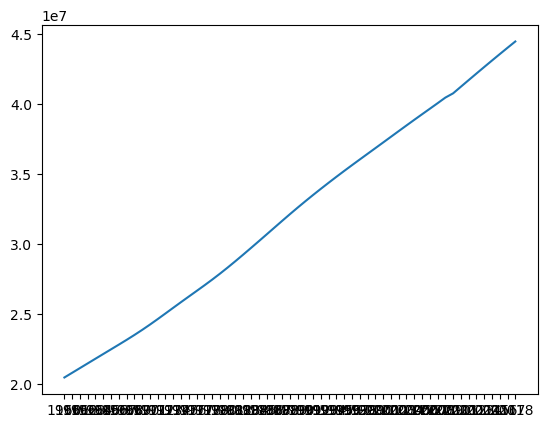

In [103]:
plt.plot(arg_population['Year'], arg_population['population'])

### Exercise
1. Create a data frame that contains the average of the selected countries for each year.
2. Plot this average as a lineplot over the years.

## A taste of what's coming up next week!

In [ ]:
import seaborn as sns
sns.lineplot(data=tidied_populations, x='Year', y='population', hue = 'Country Code')